# DAY 2: Probabilistic Models; k-NN and Regression Trees

### Machine Learning and Computational Statistics (DSC6232) 
#### Instructors: Weiwei Pan, Melanie Fernandez, Pavlos Protopapas 
#### Due: July 23nd, 2:00 pm Kigali Time



**First name**: _________________________________________________________


**Last name**: _____________


## Learning Goals:

1. work with the probabilistic interpretation of regression
2. interpret the likelihood function
3. train and understand k-nearest neighbors and regression trees

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

### We include helper functions here that we will need later (no need to read in detail!)

In [ ]:
''' Function to generate a toy dataset '''
def generate_toy_data(n_points=20, noise_std=0.25):

    x = np.linspace(-5, 5, n_points)

    #define a function relating input to output
    f = lambda x: 0.01 * x**3

    #generate noisy training labels
    y = f(x) + np.random.normal(0, noise_std, n_points)
    
    return x, y

# 1. k-Nearest Neighbor Regression

In this section, we'll explore how the choice of $k$ affects the kNN regression model.

**Exercise 1:** Fit kNN regression models to a data set using $k = 1, 3, 10$ and $20$ neighbors. 

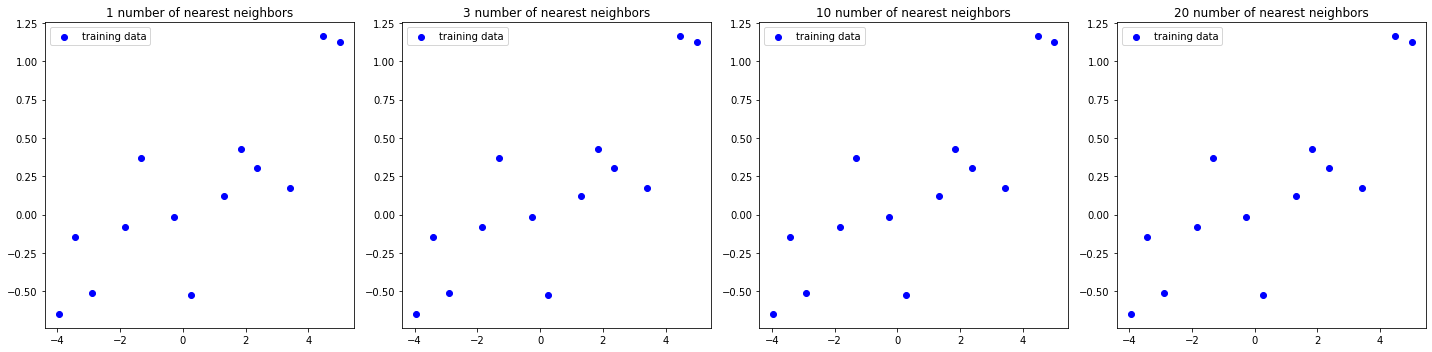

In [ ]:
# Step 0. Generate a data set for doing regression
x, y = generate_toy_data()

# split our data set into training and testing using a the 'train_test_split' function from sklearn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


# Step 1. Define a function that fits a kNN regression model and makes predictions for x

def knn_regression(x, k=1):
    ''' Returns model predictions at location x
      Inputs:
        * x_test: location of inputs for which we want to make a prediction
        * k: number of neighbors
      Output:
        * y_pred: predictions of trained model  
    '''
    pass # remove this line when you fill in the function!
    ## COMPLETE
    # A. instantiate an sklearn KNeighborsRegressor model (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
    # B. fit the knn regression model to our training data
    # C. use the trained model to predict labels on the training data
    # y_pred = ...
    #return y_pred


# Step 2. Fit a number of kNN regression models and visualize them

# list of numbers of neighbors to try
k_neighbors = [1, 3, 10, 20]

fig, ax = plt.subplots(1, len(k_neighbors), figsize=(5 * len(k_neighbors), 5))

# iterate through the list of number of neighbors
for i in range(len(k_neighbors)):
    ax[i].scatter(x_train, y_train, color='blue', label='training data') # plot the training data
    #y_pred = knn_regression(x_train, k_neighbors[i]) # fit a knn regression model and make predictions    
    #
    #ax[i].plot(x_train, y_pred, color='red', label='{}NN model'.format(k_neighbors[i])) # plot the predictions
    #
    ax[i].set_title('{} number of nearest neighbors'.format(k_neighbors[i]))
    ax[i].legend(loc='best')
    
plt.tight_layout()
plt.show()

## 2. Regression Trees
In this section, we'll explore how the choice of tree depth affect the Regression Tree model.

**Exercise 2:** Fit Regression Tree models with depth=2 and depth=6 on the same set of data.

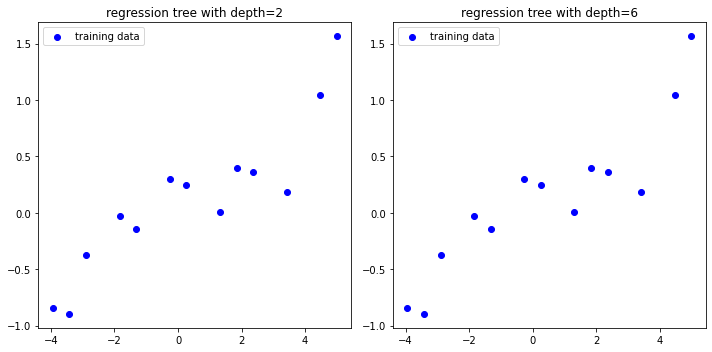

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Step 1: 
# A. Instantiate an sklearn DecisionTreeRegressor model with maximum depth = 2
#    Hint: read the documentation https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
# B. Fit the model to the training data
# C. Predict the labels of the training data
#    y_pred_1 = ...
# D. Plot the predictions on the training data
#    ax[0].plot(x_train, y_pred_1, color='red', label='depth 2 tree')

ax[0].scatter(x_train, y_train, color='blue', label='training data')
ax[0].legend(loc='best')
ax[0].set_title('regression tree with depth=2')

# Step 2: 
# A. Instantiate an sklearn DecisionTreeRegressor model with maximum depth = 6
# B. Fit the model to the training data
# C. Predict the labels of the training data
#    y_pred_2 = ...
# D. Plot the predictions on the training data
#    ax[1].plot(x_train, y_pred_2, color='red', label='depth 6 tree')

ax[1].scatter(x_train, y_train, color='blue', label='training data')
ax[1].legend(loc='best')
ax[1].set_title('regression tree with depth=6')

plt.tight_layout()
plt.show()

## 3. Model Comparison

**Exercise 3:** For the kNN regression models, which choices of $k$ (if any) lead to overfitting and which choices (if any) lead to underfitting? Can you explain why this is happening?

For the decision tree models, which choices of $k$ (if any) lead to overfitting and which choices (if any) lead to underfitting? Can you explain why this is happening?

---
# The following exercises are extra credit, they are optional.

## 5. The label $y$ is a Random Variable

In the lectures, we saw that, in regression, we can view the label $y$ as the noisy observation of a function $f(x)$. That is,
$$
y = f(x) + \epsilon,\; \epsilon \sim \mathcal{N}(0, \sigma^2),
$$
where $\epsilon$ represents the output noise, and is a normally distributed random variable.

We claimed that $y$ is then a random variable distributed as $y\sim \mathcal{N}(f(x), \sigma^2)$.

**Exercise 1 (Extra Credit):** In this exercise, fix $x=2$, let $f(x) = x + 2$ and $\epsilon \sim \mathcal{N}(0, 1)$. Sample $N$ number of $\epsilon$'s and show that $y$ is a normally distributed random variable by plotting values of $y$ in a histogram. What is the mean and variance of the random variable $y$?

In [ ]:
###
# 
# Step 1: Sample the noise from a normal distribution with the appropriate mean and variance
# (Hint: use the .normal function from numpy.random. 
# See documentation at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)
# COMPLETE
# 
# Step 2: Visualize the variation of the prediction caused by the variation of the noise
# (Hint: use matplotlib to plot a histogram of the y's)
# COMPLETE
#
###

## 2. Interpreting the likelihood function

Say we're considering two linear models for the dataset $\{(1, 2), (2, 3)\}$ with i.i.d. noise $\epsilon_n \sim \mathcal{N}(0, 1)$.

1. Model 1: $y = x + 2$
2. Model 2: $y = -2x + 2$

In [ ]:
# define the dataset
x_train = np.array([1, 2])
y_train = np.array([2, 3])

# the gaussian likelihood of the training set
lkhd = lambda m, b: norm(m * x_train[0] + b, 1).pdf(y_train[0]) * norm(m * x_train[1] + b, 1).pdf(y_train[1])

# compute the likelihood under model 1
likelihood_1 = lkhd(1, 2)

# compute the likelihood under model 2
likelihood_2 = lkhd(-2, 2)

print('likelihood of data under model 1:', np.round(likelihood_1, 7))
print('likelihood of data under model 2:', np.round(likelihood_2, 7))

likelihood of data under model 1: 0.0585498
likelihood of data under model 2: 1e-07


**Exercise 2 (Extra Credit)**: Plot the dataset as well as the two models. 
Which model, assuming one is correct, is more appropriate for the data? Why? Support your answer using the likelihoods as well as the visualizations.

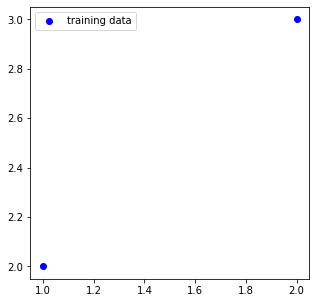

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# define the two models as functions
model_1 = lambda x: x + 2 # define model 1 
model_2 = lambda y: -2 * x + 2 # define model 2

# generate 100 x-values for plotting
x = np.linspace(-1, 5, 100)

# Evaluate model 1 and 2 on the 100 x-values
# COMPLETE
# y_pred_1 = ...
# y_pred_2 = ...

# Visualize the two models on the same plot
# COMPLETE
# ax.plot(x, y_pred_1, color='red', label='model 1')
# ax.plot(x, y_pred_2, color='orangered', label='model 2')

ax.scatter(x_train, y_train, color='blue', label='training data')
ax.legend(loc='best')

plt.show()